# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Install Datasets and Upgrade TensorFlow

To ensure we can download the latest version of the `oxford_flowers102` dataset, let's first install both `tensorflow-datasets` and `tfds-nightly`.
* `tensorflow-datasets` is the stable version that is released on a cadence of every few months
* `tfds-nightly` is released every day and has the latest version of the datasets

We'll also upgrade TensorFlow to ensure we have a version that is compatible with the latest version of the dataset.

In [1]:

%pip --no-cache-dir install tensorflow-datasets --user
%pip --no-cache-dir install tfds-nightly --user
%pip --no-cache-dir install --upgrade tensorflow --user

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 4.5MB 4.8MB/s eta 0:00:01
     |████████████████████████████████| 409kB 37.7MB/s eta 0:00:01
     |████████████████████████████████| 102kB 44.5MB/s ta 0:00:01
ERROR: tensorflow-metadata 0.14.0 has requirement protobuf<4,>=3.7, but you'll have protobuf 4.21.4 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 511.7MB 41.9MB/s eta 0:00:01    |████▋                           | 73.1MB 48.1MB/s eta 0:00:10
     |████████████████████████████████| 5.8MB 37.2MB/s eta 0:00:01
     |████████████████████████████████| 133kB 47.7MB/s eta 0:00:01


     |████████████████████████████████| 2.4MB 28.2MB/s eta 0:00:01
     |████████████████████████████████| 440kB 50.3MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 47.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 43.8MB/s eta 0:00:01
     |████████████████████████████████| 4.6MB 28.6MB/s eta 0:00:01
     |████████████████████████████████| 15.7MB 38.6MB/s eta 0:00:01
     |████████████████████████████████| 40kB 32.8MB/s eta 0:00:01
     |████████████████████████████████| 14.5MB 31.5MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 40.4MB/s eta 0:00:01
     |████████████████████████████████| 174kB 48.5MB/s eta 0:00:01
     |████████████████████████████████| 788kB 50.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 41.0MB/s eta 0:00:01
     |████████████████████████████████| 4.9MB 38.1MB/s eta 0:00:01
     |████████████████████████████████| 163kB 40.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 41.9MB/s eta 0:00

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Found existing installation: protobuf 4.21.4
    Uninstalling protobuf-4.21.4:
      Successfully uninstalled protobuf-4.21.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


After the above installations have finished **be sure to restart the kernel**. You can do this by going to **Kernel > Restart**.

In [1]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

# Ignore some warnings that are not relevant (you can remove this if you prefer)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TODO: Make all other necessary imports.
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Some other recommended settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tfds.disable_progress_bar()

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()

dataset, dataset_info = tfds.load('oxford_flowers102', with_info = True, as_supervised=True)


In [5]:
# Check if dataset is a dictionary and the keys of it
print('Is the dataset dictionary type?', type(dataset) is dict)
print('\nThe keys of dataset are:', list(dataset.keys()))

# TODO: Create a training set, a validation set and a test set.
training_set, validation_set, test_set = dataset['train'], dataset['validation'], dataset['test']

#check the info of the database
dataset_info

Is the dataset dictionary type? True

The keys of dataset are: ['train', 'test', 'validation']


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
    in the United Kingdom. Each class consists of between 40 and 258 images. The images have
    large scale, pose and light variations. In addition, there are categories that have large
    variations within the category and several very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set.
    The training set and validation set each consist of 10 images per class (totalling 1020 images each).
    The test set consists of the remaining 6149 images (minimum 20 per class).
    
    Note: The dataset by default comes with a test size larger than the train
    size. For more info see this [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    data

## Explore the Dataset

In [6]:
# TODO: Get the number of examples in each set from the dataset info.

training_examples_num  = dataset_info.splits['train'].num_examples
test_examples_num = dataset_info.splits['test'].num_examples
validating_examples_num = dataset_info.splits['validation'].num_examples


print('Testing dataset has {} images'.format(test_examples_num))
print('Training dataset has {} images'.format(training_examples_num))
print('Validating dataset has {} images'.format(validating_examples_num))

# TODO: Get the number of classes in the dataset from the dataset info.

classes_num = dataset_info.features['label'].num_classes
print('\nThe dataset has {} classes. '.format(classes_num))


Testing dataset has 6149 images
Training dataset has 1020 images
Validating dataset has 1020 images

The dataset has 102 classes. 


In [7]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
i = 3 # no of examples 
image_example = []
label_example = []
print('The {} images in the training set examples have:'.format(i))

for n in range(0,i):
    print('\n\u2022 Image no. {}:'.format(n+1))
    for image , label in training_set.take(i):
                image_example.append(image.numpy())
                label_example.append(label.numpy())
                
    print('shape is:', image_example[n].shape)   
    print('label is:',label_example[n])
                
        

The 3 images in the training set examples have:

• Image no. 1:
shape is: (500, 667, 3)
label is: 72

• Image no. 2:
shape is: (500, 666, 3)
label is: 84

• Image no. 3:
shape is: (670, 500, 3)
label is: 70


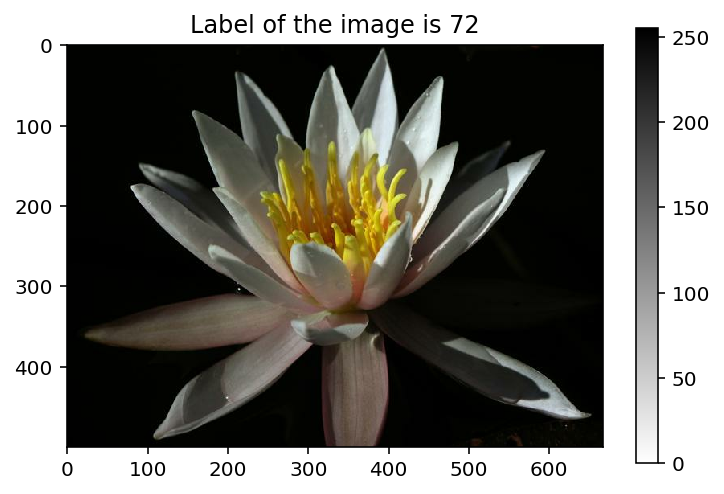

In [8]:
# TODO: Plot 1 image from the training set.
for current_image, current_label in training_set.take(1):
    current_image = current_image.numpy()
    current_label = current_label.numpy()
    
 # Set the title of the plot to the corresponding image label.
plt.title('Label of the image is {}'.format(current_label))
plt.imshow(current_image, cmap= plt.cm.gist_yarg)
plt.colorbar()
plt.show()
 # we can notice the image size in the plotted image, as coded in the above function


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [9]:
# we should import json
import json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

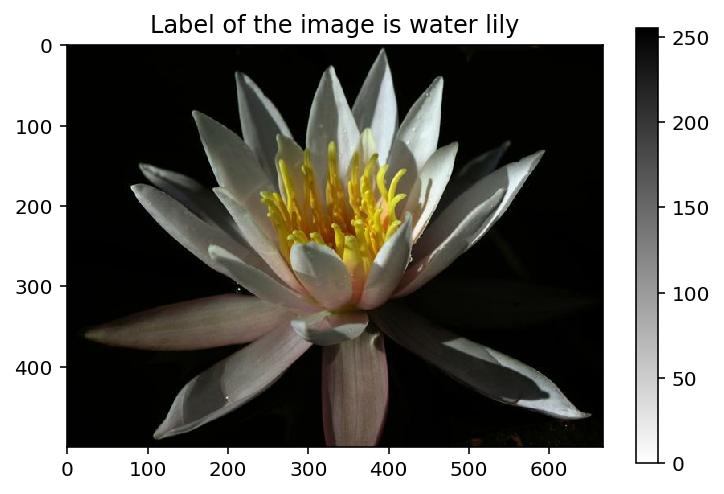

In [10]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

plt.title('Label of the image is {}'.format(class_names[str(current_label+1)]))
plt.imshow(current_image, cmap= plt.cm.gist_yarg)
plt.colorbar()
plt.show()

## Create Pipeline

In [11]:
# TODO: Create a pipeline for each set.
#set the variables, batch size and the size of input image
image_size=224
batch_size = 64

def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image=tf.image.resize(image,(image_size,image_size))
    image /= 255
    return image, label



training_batches = training_set.cache().shuffle(training_examples_num//7).padded_batch(batch_size).map(normalize).prefetch(1)
testing_batches = test_set.cache().padded_batch(batch_size).map(normalize).prefetch(1)
validation_batches = validation_set.cache().padded_batch(batch_size).map(normalize).prefetch(1)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [12]:
# TODO: Build and train your network.
import tensorflow_hub as hub
Link = 'https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5' 
feature_extractor = hub.KerasLayer(Link)  # add the pretained model 
feature_extractor.trainable = False #dont update the weights

In [13]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(classes_num, activation='softmax') #output to the 102 classes.  
])

model.build([None, image_size, image_size, 3])

model.summary()



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 102)               102204    
                                                                 
Total params: 5,610,917
Trainable params: 102,204
Non-trainable params: 5,508,713
_________________________________________________________________


In [ ]:
#complie the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#start training the model, I choose ReduceLROnPlateu callback to stop the model.

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, min_lr=0.001)
EPOCHS = 40
history = model.fit(
  training_batches,
  epochs=EPOCHS,
  validation_data=validation_batches,
  callbacks=[reduce_lr]
)

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - ETA: 0s - loss: 6.4507 - accuracy: 0.0265WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f34c0218d40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 53s 3s/step - loss: 6.4507 - accuracy: 0.0265 - val_loss: 3.8909 - val_accuracy: 0.1461 - lr: 0.0010
Epoch 2/40
16/16 [==============================] - 42s 3s/step - loss: 4.4763 - accuracy: 0.1167 - val_loss: 2.7371 - val_accuracy: 0.3775 - lr: 0.0010
Epoch 3/40
16/16 [==============================] - 42s 3s/step - loss: 3.1454 - accuracy: 0.2745 - val_loss: 2.0544 - val_accuracy: 0.5382 - lr: 0.0010
Epoch 4/40
16/16 [==============================] - 42s 3s/step - loss: 2.3683 - accuracy: 0.4333 - val_loss: 1.6893 - val_accuracy: 0.6147 - lr: 0.0010
Epoch 5/40
16/16 [==============================] - 44s 3s/step - loss: 1.8676 - accurac

In [20]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_acc, label='Training Accuracy')
plt.plot(epochs_range, validation_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy of Training and Validation datasets')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss of Training and Validation datasets')
plt.show()

NameError: name 'history' is not defined

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [16]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

loss, accuracy = model.evaluate(testing_batches)
print('The test set has:')
print('\nLoss: {:,.3}'.format(loss))
print('Accuracy: {:.3%}'.format(accuracy))

97/97 [==============================] - 125s 1s/step - loss: 0.9194 - accuracy: 0.7591
The test set has:

Loss: 0.919
Accuracy: 75.915%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [17]:
# TODO: Save your trained model as a Keras model.
import time 
time_model = time.time()

saved_model_filepath = './{}.h5'.format(int(time_model))

model.save(saved_model_filepath)

## Load the Keras Model

Load the Keras model you saved above.

In [18]:
# TODO: Load the Keras model
reload_model = tf.keras.models.load_model(saved_model_filepath,custom_objects={'KerasLayer':hub.KerasLayer})

reload_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 102)               102204    
                                                                 
Total params: 5,610,917
Trainable params: 102,204
Non-trainable params: 5,508,713
_________________________________________________________________


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [19]:
# TODO: Create the process_image function
def process_image(numpy_i):
    image_size=224
    tensor_i=tf.convert_to_tensor(numpy_i,tf.float32)
    tensor_i = tf.image.resize(tensor_i, (image_size, image_size))
    tensor_i /= 255
    return tensor_i.numpy()

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

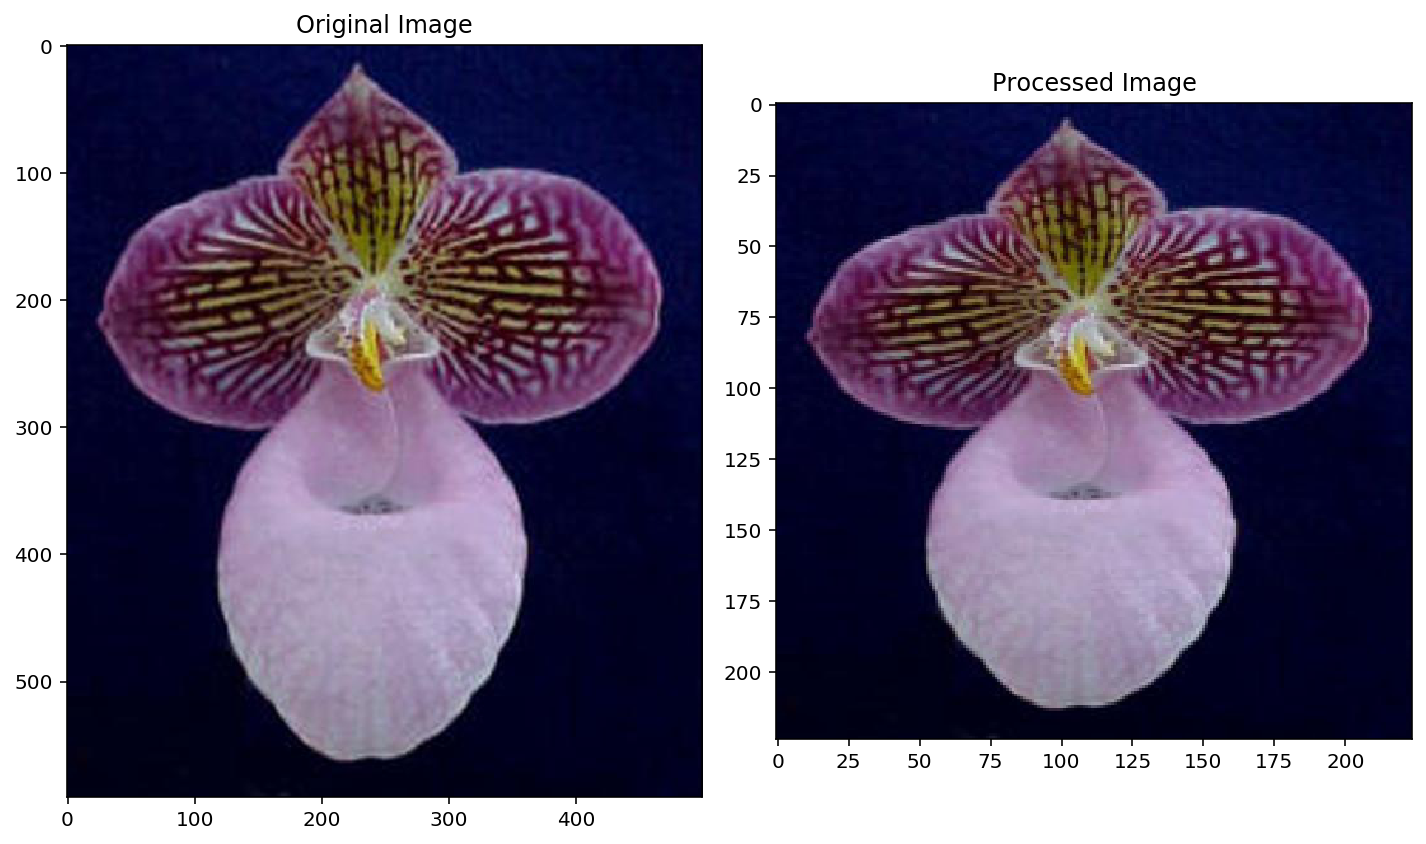

In [20]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [77]:
# TODO: Create the predict function

def predict(image_path, model, top_k): 
        im = Image.open(image_path)
        im_numpy = np.asarray(im)
        processed_image = process_image(im_numpy)
        processed_image = np.expand_dims(processed_image,axis = 0)
        prediction=model.predict(processed_image)
    
        classes, probs = tf.nn.top_k(prediction, k=top_k)
  
        return classes, probs
     



    
probs,classes= predict('./test_images/hard-leaved_pocket_orchid.jpg', model, 5)

# to check the function 
print('Top probabilties are: {}'.format(probs.numpy()))
print('\nTop classes are: {}'.format(classes.numpy()))


1/1 [==============================] - 0s 46ms/step
Top probabilties are: [[9.9919778e-01 2.3660518e-04 1.8127088e-04 6.8156129e-05 5.1421783e-05]]

Top classes are: [[ 1 79 64 88 67]]


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 45ms/step
tf.Tensor([[0.42222407 0.40446088 0.04099381 0.03422963 0.02108368]], shape=(1, 5), dtype=float32)

classes
tf.Tensor([[58  4 59 48 99]], shape=(1, 5), dtype=int32)
./test_images/orange_dahlia.jpg
[0.42222407, 0.40446088, 0.040993806, 0.03422963, 0.021083685]


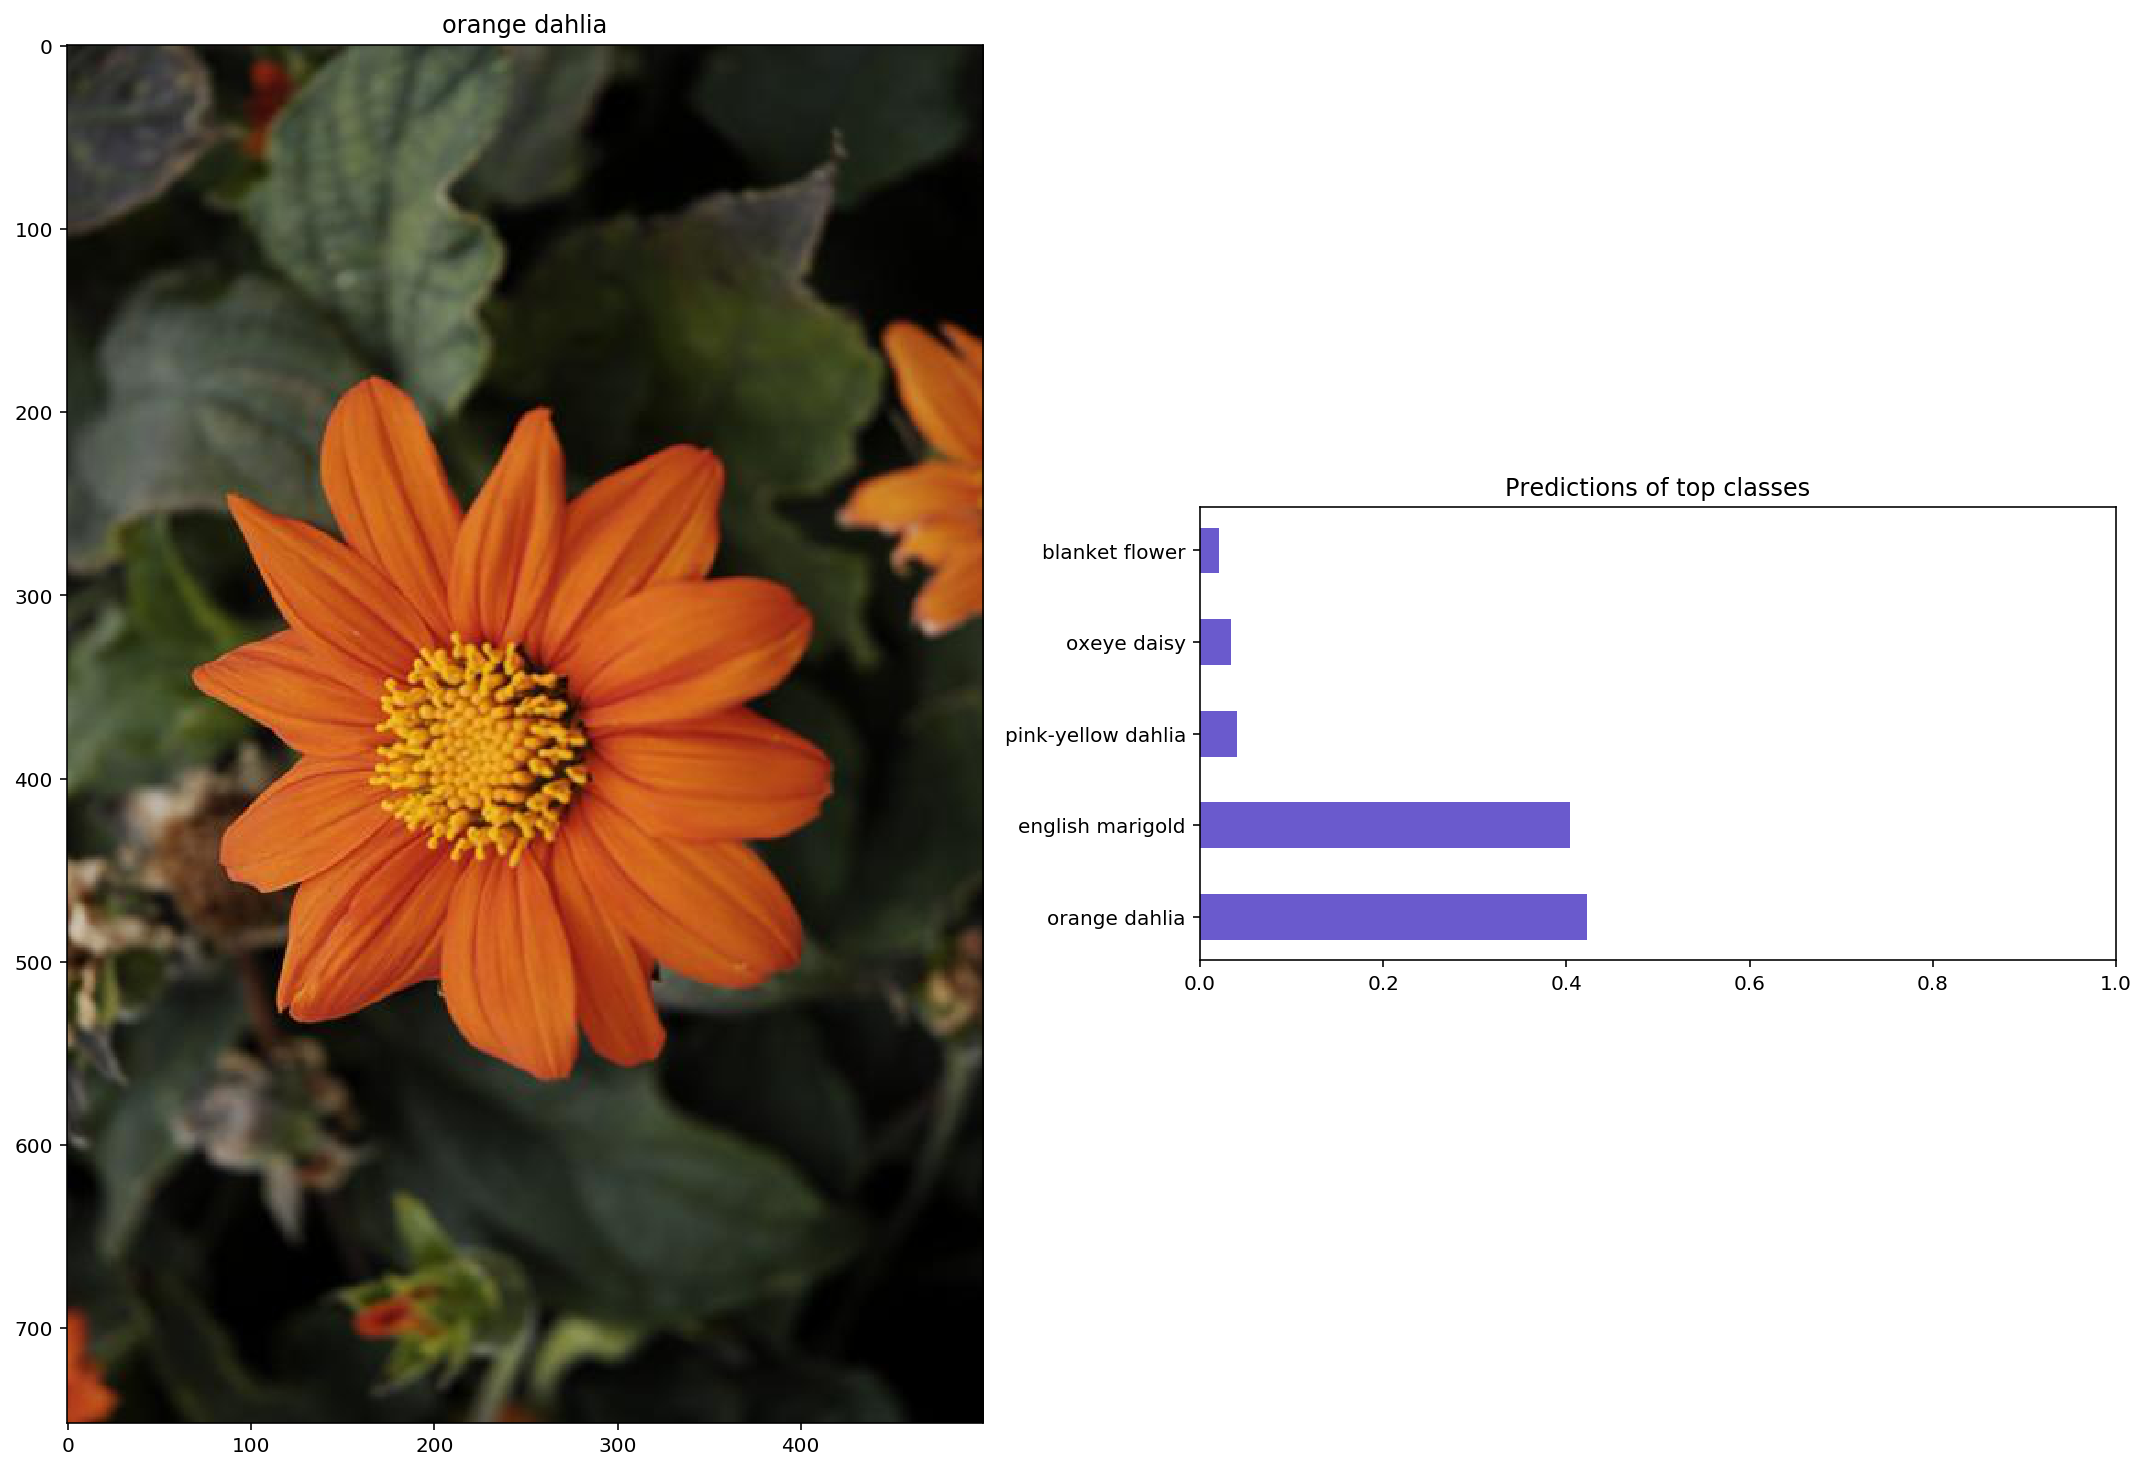

1/1 [==============================] - 0s 45ms/step
tf.Tensor([[0.1981602  0.1949291  0.19227916 0.13806276 0.11011334]], shape=(1, 5), dtype=float32)

classes
tf.Tensor([[81 62 68 97 51]], shape=(1, 5), dtype=int32)
./test_images/wild_pansy.jpg
[0.1981602, 0.1949291, 0.19227916, 0.13806276, 0.11011334]


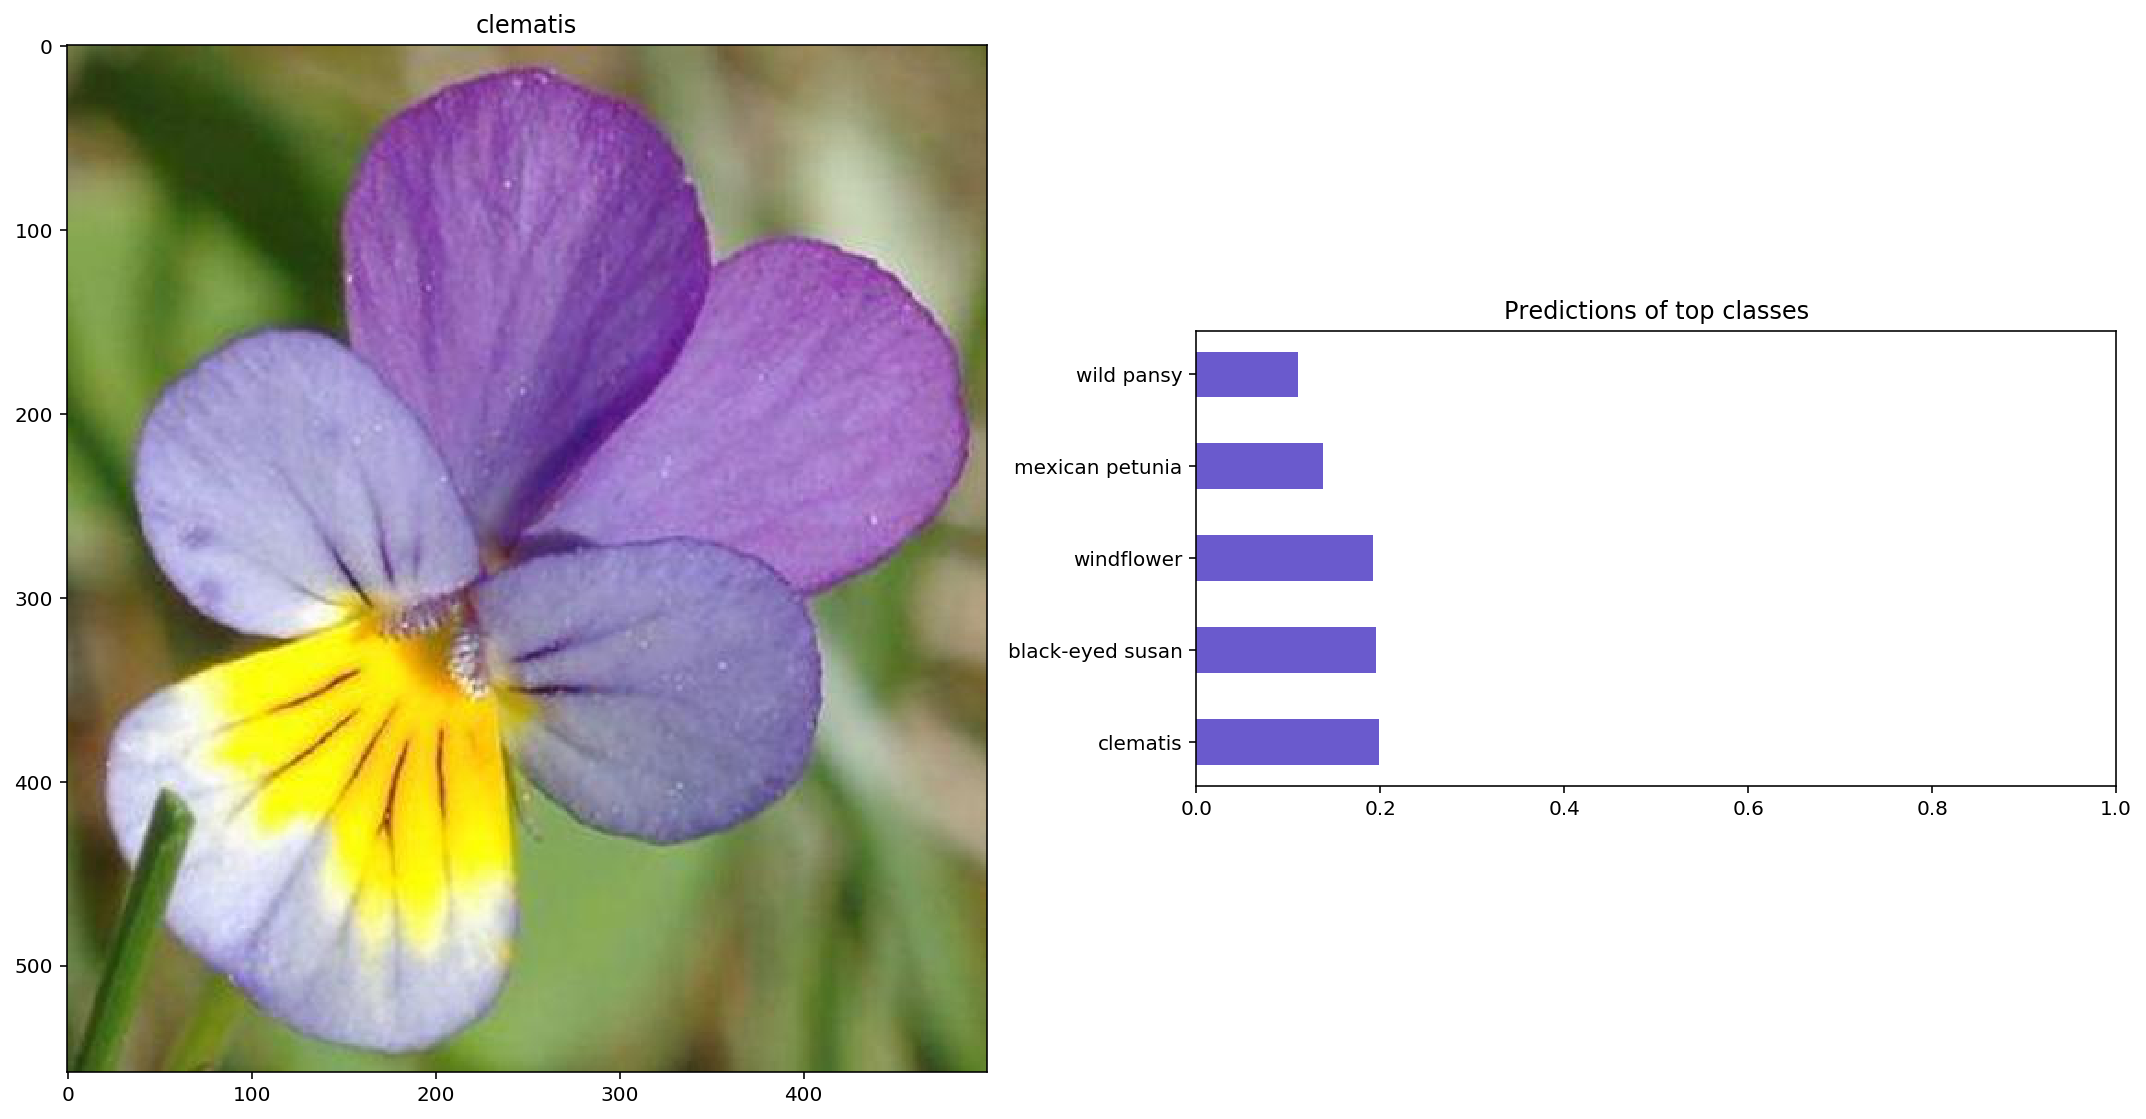

1/1 [==============================] - 0s 44ms/step
tf.Tensor([[9.9919778e-01 2.3660518e-04 1.8127088e-04 6.8156129e-05 5.1421783e-05]], shape=(1, 5), dtype=float32)

classes
tf.Tensor([[ 1 79 64 88 67]], shape=(1, 5), dtype=int32)
./test_images/hard-leaved_pocket_orchid.jpg
[0.9991978, 0.00023660518, 0.00018127088, 6.815613e-05, 5.1421783e-05]


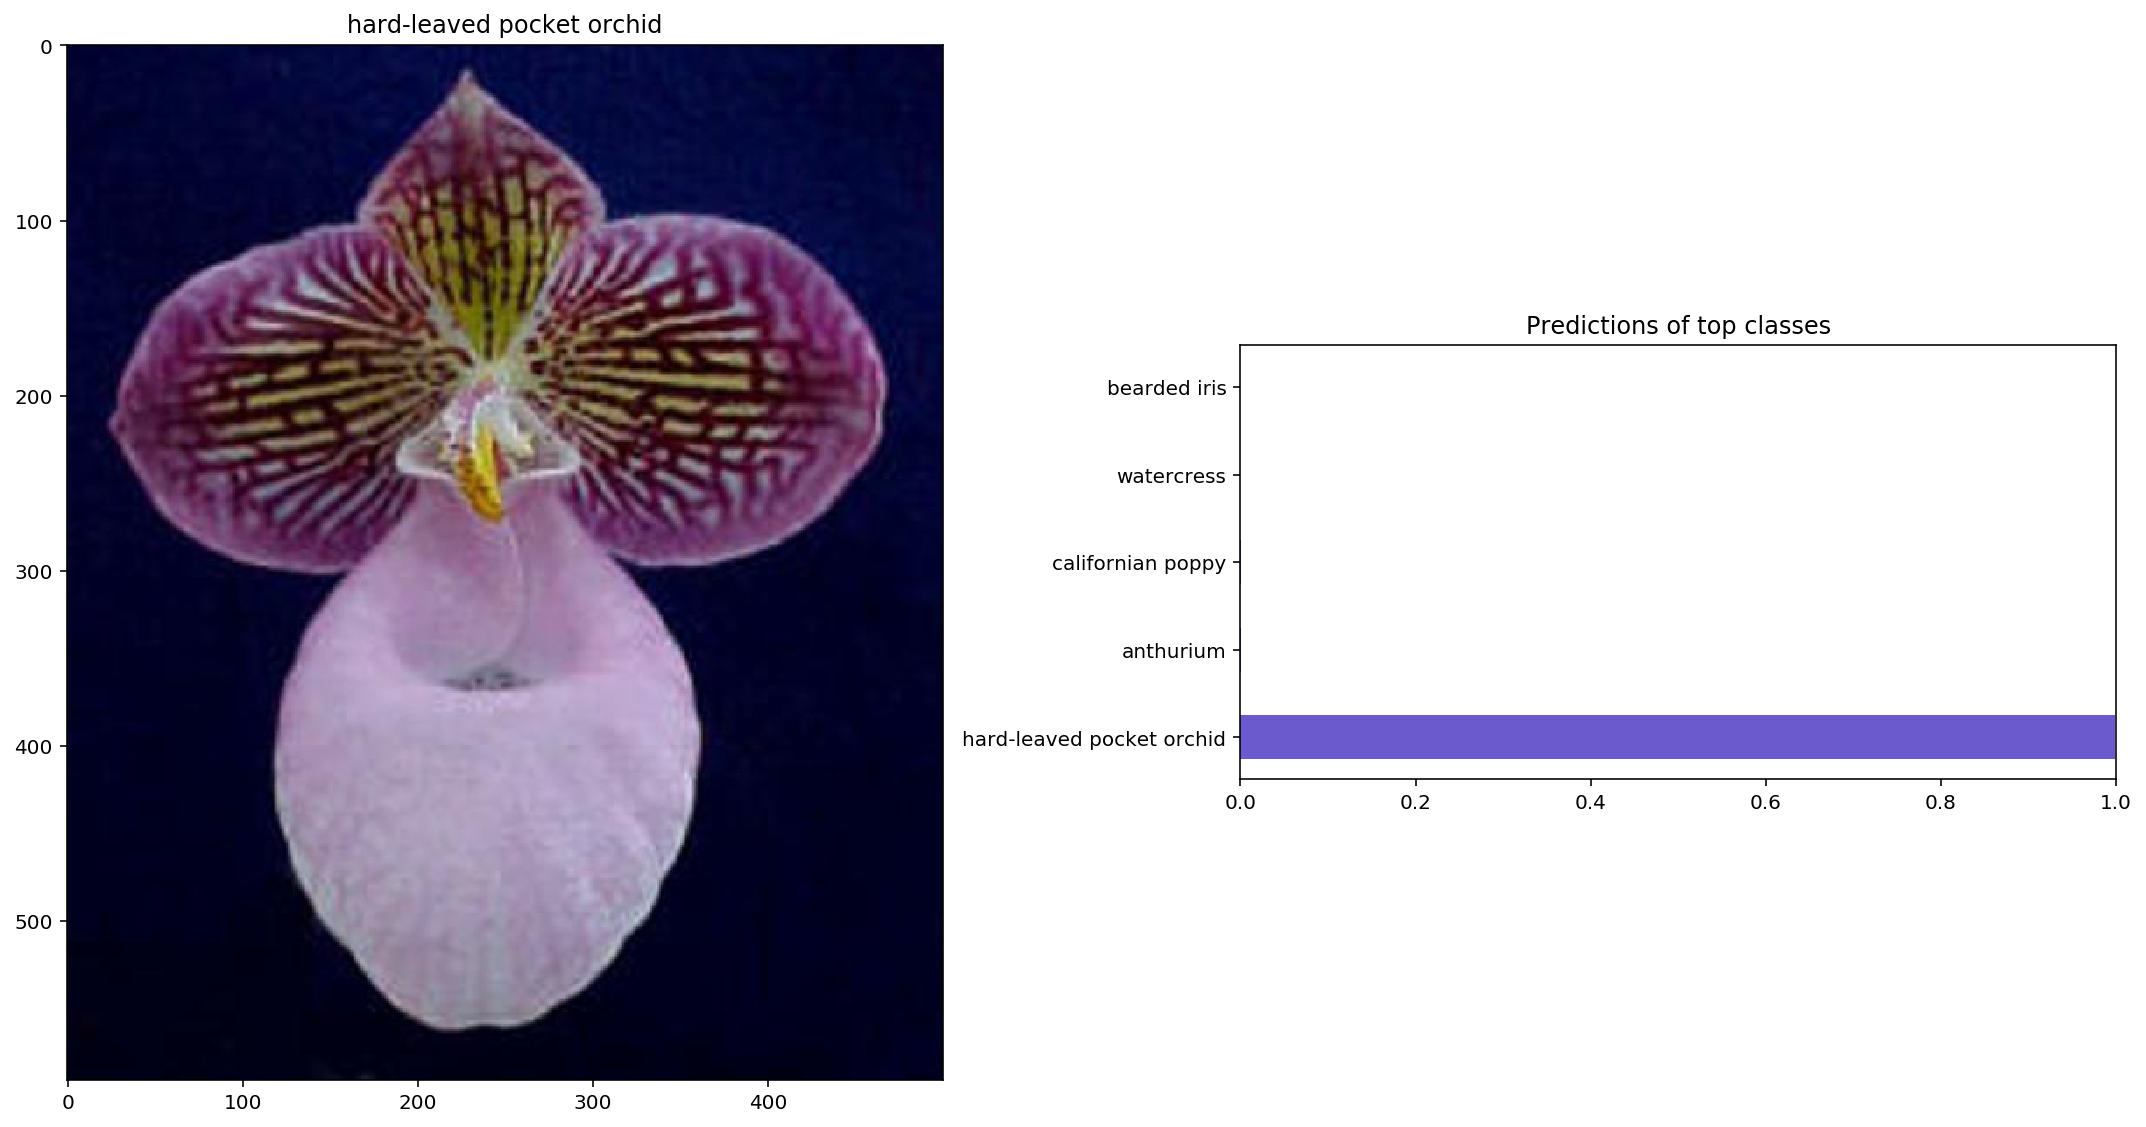

1/1 [==============================] - 0s 45ms/step
tf.Tensor([[0.9750299  0.00873549 0.00520408 0.00361348 0.00147223]], shape=(1, 5), dtype=float32)

classes
tf.Tensor([[60 45 23 77 73]], shape=(1, 5), dtype=int32)
./test_images/cautleya_spicata.jpg
[0.9750299, 0.008735486, 0.0052040783, 0.003613478, 0.0014722279]


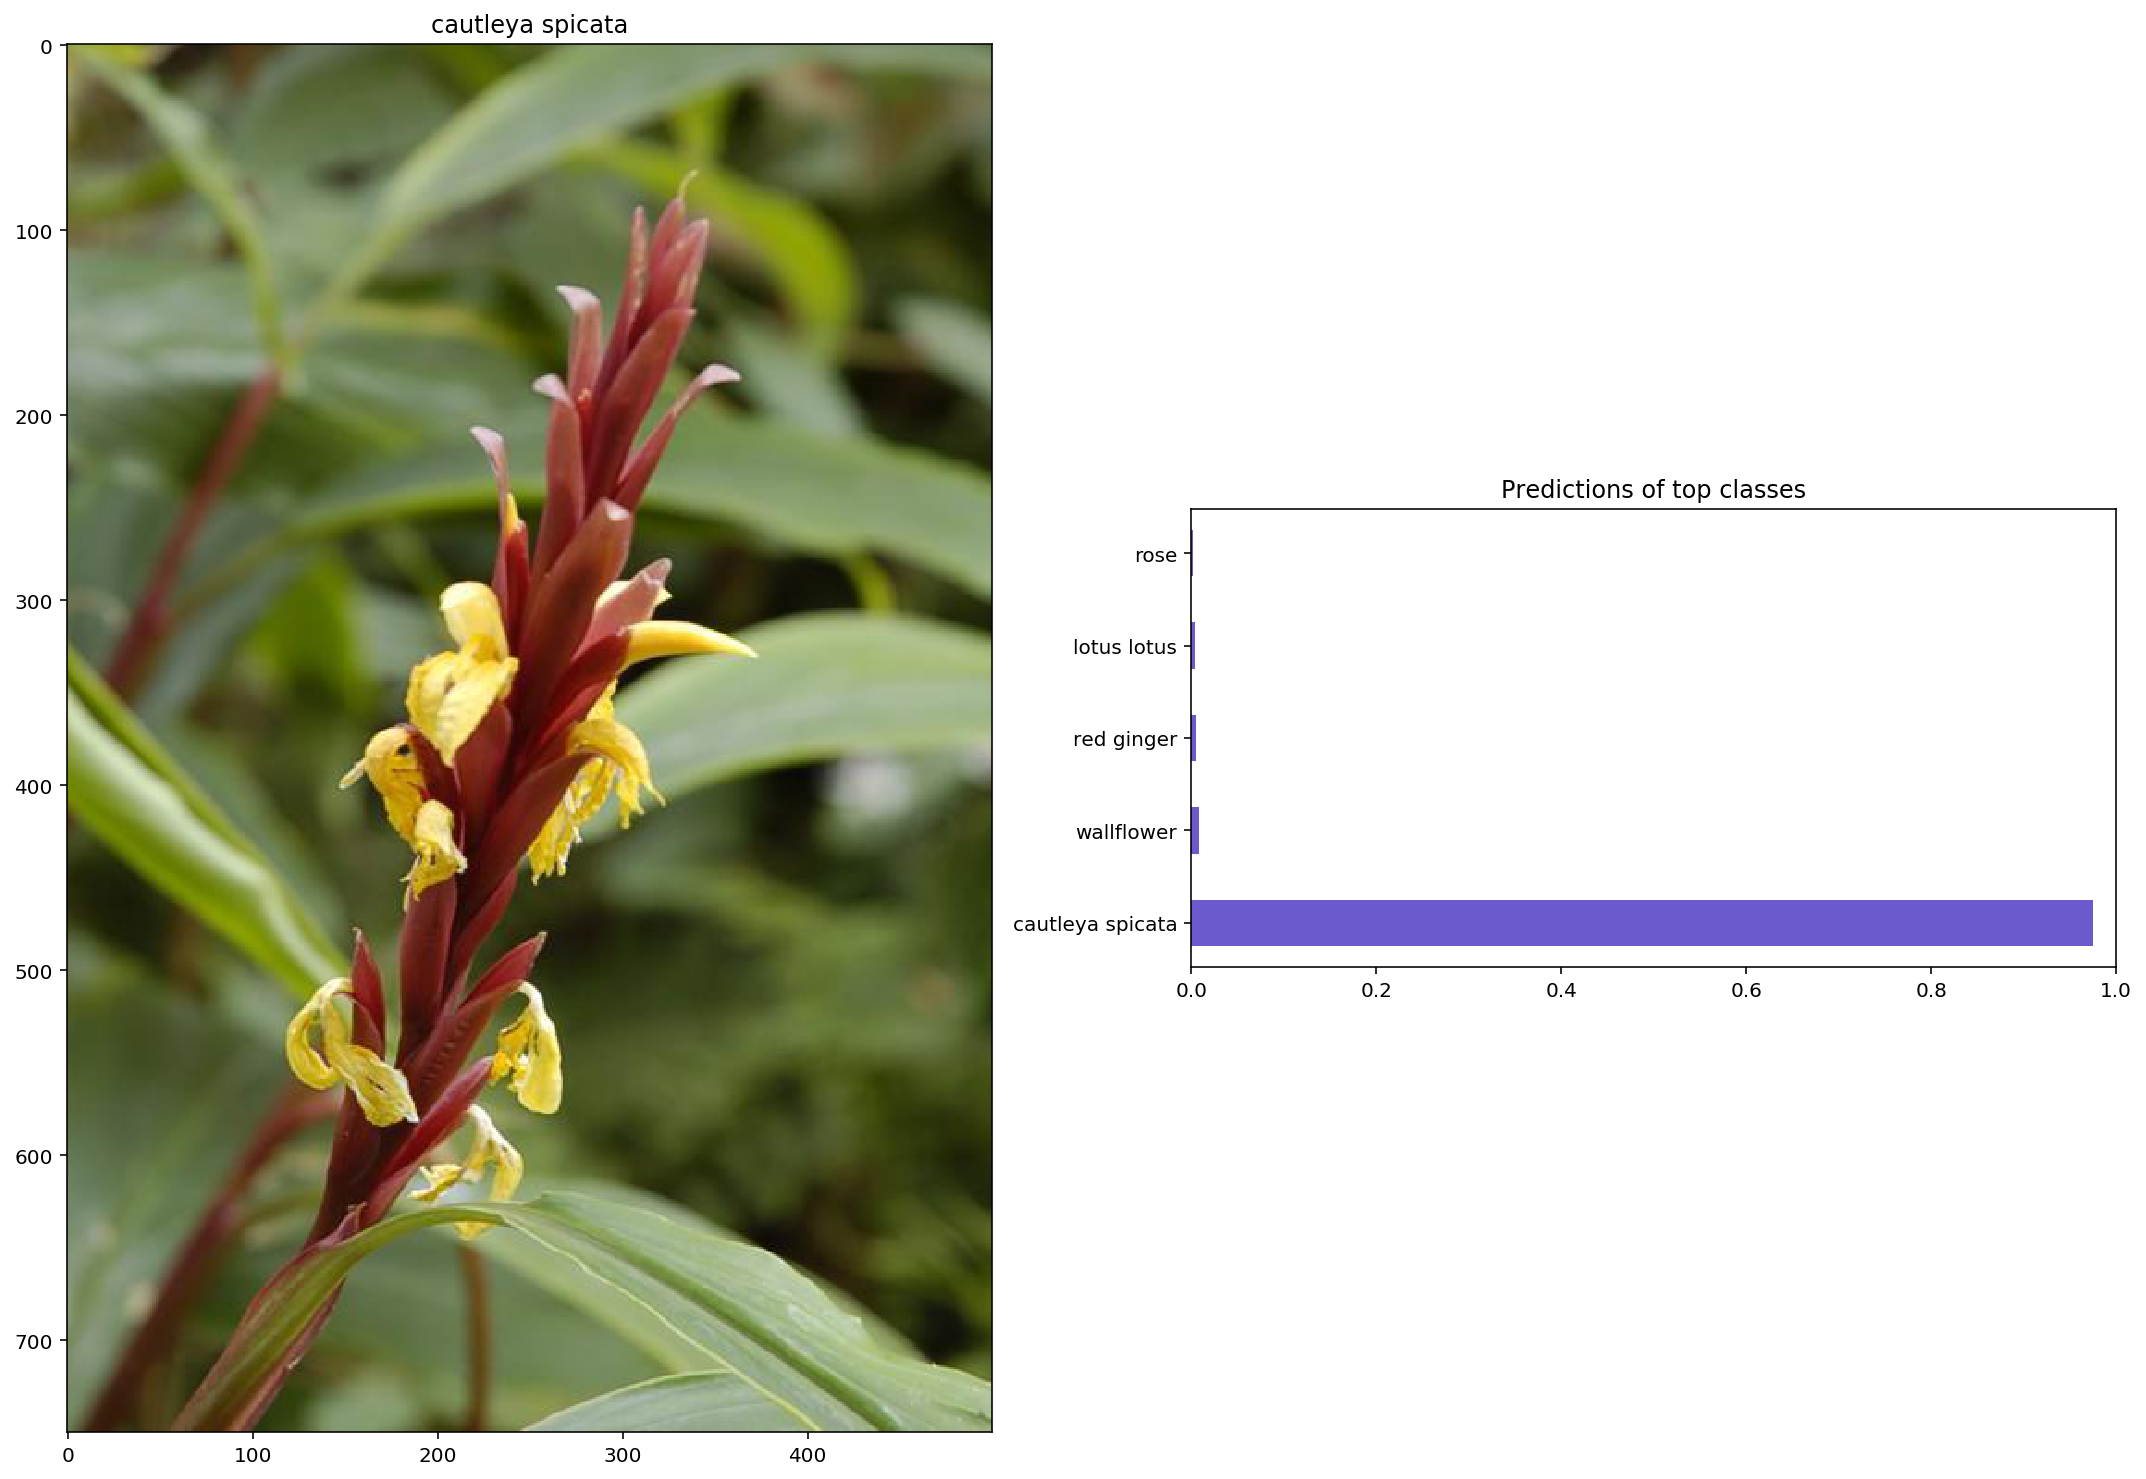

In [276]:
# TODO: Plot the input image along with the top 5 classes

import os 
import pandas as pd
n_images= 4 # the no of images we want to plot
images_path_ = './test_images' #location of images 

for file_name in os.listdir(images_path_):
        image_path = '{}/{}'.format(images_path_, file_name)
        images = Image.open(image_path)
        images = np.asarray(images)
        
        probs, classes = predict(image_path, model, 5)
        print(probs)
        print('\nclasses')
        print(classes)
        
        Top_k=5
        CLASSES = []
        PROBS = []
        for n in range(Top_k):
            for class_i in classes.numpy():
                #print(class_names[str(class_i[n]+1)]) check the values
                CLASSES.append(class_names[str(class_i[n]+1)])
            for probs_i in probs.numpy():
                #print(probs_i[n]) check the values
                PROBS.append(probs_i[n])
                
        
        print(image_path)
        print(PROBS)
        fig, (ax1, ax2) = plt.subplots(figsize=(15,15), ncols=2)
        ax1.set_title(class_names[str(class_i[0]+1)])
        ax1.imshow(images)
        ax2.set_yticklabels(CLASSES, size='medium')
        ax2.set_title('Predictions of top classes')
        ax2.barh(CLASSES,PROBS ,0.5,color='slateblue')
        ax2.set_aspect(0.1)
        ax2.set_xlim(0, 1)
        
        plt.tight_layout()      
        
        plt.show()
        
        
#We can notice from the prediction below, our model can predict 3 out of 4 flowers correctly. Further improvments can be made to
# increase the performance of the model